# Setup 

In [1]:
import sys
sys.path.append('/Users/moharb/Documents/Repos/map-ephys/') #
sys.path.append('C:\\Users\\moharb\\Documents\\Repos\\map-ephys\\')
import os
import getpass
import datajoint as dj
dj.config['database.host'] = 'mesoscale-activity.datajoint.io'
dj.config['database.user'] = 'boazmohar'
dj.config['lab.database'] = 'boazmohar_lab'
dj.config['ccf.database'] = 'boazmohar_ccf'
dj.config['experiment.database'] = 'boazmohar_experiment'
dj.config['database.password'] = 'rodent-research'

from pipeline import experiment
from pipeline import lab
from pipeline import imaging
from pipeline import registration

Connecting boazmohar@mesoscale-activity.datajoint.io:3306


In [2]:

def dropdbs():
    print('dropping databases: \n\n')
    for d in ['experiment', 'lab', 'ccf', 'imaging', 'registration']:
        try:
            schema = dj.schema('boazmohar_%s' % d, locals())
            schema.drop(force=True)
            print('dropping {d}'.format(d=d))
        except Exception as e:
            print('error dropping {d}: {e}'
                 .format(d=d, e=str(e)))
dropdbs()
dropdbs()
dropdbs()

dropping databases: 


error dropping experiment: (1451, 'Cannot delete or update a parent row: a foreign key constraint fails')
error dropping lab: (1451, 'Cannot delete or update a parent row: a foreign key constraint fails')
dropping ccf
dropping imaging
dropping registration
dropping databases: 


dropping experiment
dropping lab
dropping ccf
dropping imaging
dropping registration
dropping databases: 


dropping experiment
dropping lab
dropping ccf
dropping imaging
dropping registration


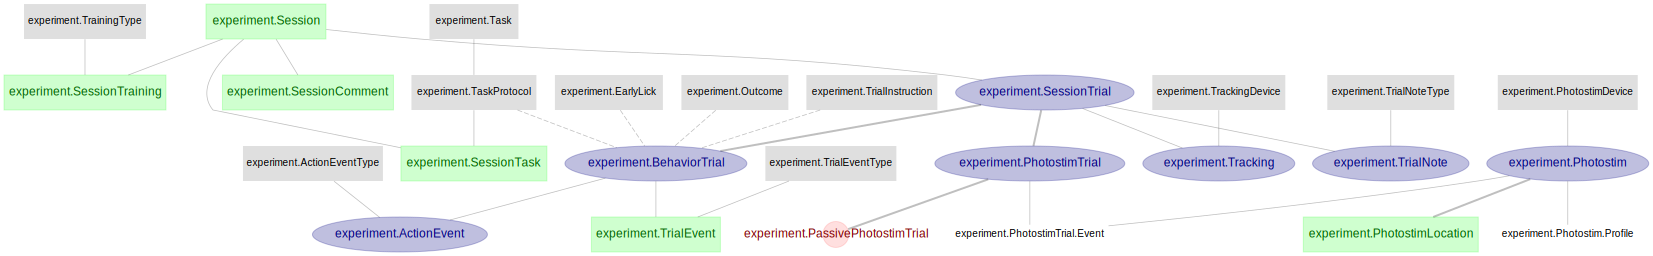

In [4]:
dj.ERD(experiment)

In [2]:
lab.Person().insert1(('boazmohar', 'Boaz Mohar'))
lab.BrainArea().insert1(('V1','Primary visual cortex'))
lab.Rig().insert1(('spine2P','2c.384','High NA 3D resonsnat 2P microscope'))
lab.Serotype.insert1(('AAV2/1', ))
lab.Subject().insert1((415099, 'boazmohar','123','2018-01-01','F','Jackson Labs'))
lab.ModifiedGene.insert1(('Ai148','CRE dependent GCaMP6f TITL2'))
lab.ModifiedGene.insert1(('Syt17','Sparse L23 CRE'))
lab.Subject().GeneModification().insert1((415099, 'Ai148', 'unknown', 'unknown'))
lab.Subject().GeneModification().insert1((415099, 'Syt17', 'unknown', 'unknown'),)
lab.Surgery().insert1((415099,1,'boazmohar','2018-08-09 14:00:00','2018-08-09 17:00:00',
                      'Ai148 Syt17 Voltron Chronos Kv2.1 in left V1'))
lab.Surgery().Procedure().insert1((415099,1,1,'Lambda',2.7,0.5,0,'Headbar and 3.5/3 window'))
lab.Virus().insert1((0, 'Janelia','AAV2/1','boazmohar','ST-Voltron',1e13,
                     '2018-08-08', 'From Schrider lab'))
lab.Virus().insert1((1, 'Janelia','AAV2/1','boazmohar','Chronos-KV2.1',1e13,
                     '2018-08-08', 'First try'))
lab.Surgery().VirusInjection().insert1((415099, 1, 1, 0, 'Lambda', 2.7, 0.5, 0.2, 30, 10,
                                       'Three injection sites'),)
lab.Surgery().VirusInjection().insert1((415099, 1, 2, 1, 'Lambda', 2.7, 0.5, 0.2, 30, 10,
                                       'Four injection sites'),)

# Imaging 

experiment.Session().insert1((415099, 1, '2018-08-19', 'boazmohar', 'Spine2P'))
experiment.Session().insert1((415099, 2, '2018-08-19', 'boazmohar', 'Spine2P'))
experiment.Session().insert1((415099, 3, '2018-08-19', 'boazmohar', 'Spine2P'))
experiment.Session().insert1((415099, 4, '2018-08-19', 'boazmohar', 'Spine2P'))
experiment.Session().insert1((415099, 5, '2018-08-19', 'boazmohar', 'Spine2P'))
experiment.Session().insert1((415099, 6, '2018-08-20', 'boazmohar', 'Spine2P'))
experiment.Session().insert1((415099, 7, '2018-08-20', 'boazmohar', 'Spine2P'))
experiment.Session().insert1((415099, 8, '2018-08-20', 'boazmohar', 'Spine2P'))
experiment.Session().insert1((415099, 9, '2018-08-20', 'boazmohar', 'Spine2P'))
imaging.FOV().insert1((415099,1,'20x',1.0, '2018-08-18 15:30:00', -5.1, 0.0, 'injection site 1 (Voltron)'))
imaging.FOV().insert1((415099,2,'20x',1.0, '2018-08-18 15:30:00', -5.1, 0.0, 'injection site 6 Chorons, -310x +10y from 1'))
imaging.FOV().insert1((415099,3,'20x',1.0, '2018-08-18 15:30:00', -5.1, 0.0, 'injection site 3 Voltron, -575x -544y from 2'))
imaging.FOV().insert1((415099,4,'20x',1.0, '2018-08-18 15:30:00', -5.1, 0.0, 'injection site 2 Voltron 1000x, -812y from FOV3'))
imaging.FOV().insert1((415099,5,'20x',1.0, '2018-08-18 15:30:00', -5.1, 0.0, 'injection site 5 Chronos -550x, -63y from FOV4'))
imaging.FOV().insert1((415099,6,'20x',1.0, '2018-08-18 15:30:00', -5.1, 0.0, 'no injection -451x 200y from FOV5'))

imaging.Path().insert1(('boaz_dm11', '/groups/svoboda/svobodalab/users/moharb/',
                 'smb:///groups/svoboda/svobodalab/users/moharb/',
                 'V:\\users\\moharb\\'))

imaging.Run().insert1((415099, 1, 1, 1, 'iso','boaz_dm11', 
                       'Grating_full_short, ISO, Psychopy died', '2018-08-19 11:00:00'))
imaging.Run().insert1((415099, 2, 1, 2, 'iso','boaz_dm11',
                       'Grating_full_short, ISO, Psychopy died', '2018-08-19 11:20:00'))
imaging.Run().insert1((415099, 3, 1, 3, 'iso','boaz_dm11',
                       'Grating_full_short, ISO,', '2018-08-19 11:30:00'))
imaging.Run().insert1((415099, 4, 2, 4, 'iso','boaz_dm11', 
                       'Grating_full_short, ISO,', '2018-08-19 11:40:00'))
imaging.Run().insert1((415099, 5, 3, 5, 'iso','boaz_dm11', 
                       'Grating_full_short, ISO, more tuned cells', '2018-08-19 11:50:00'))

imaging.Run().insert1((415099, 6, 3, 1, 'iso','boaz_dm11', 
                       'Grating_full_short, ISO, more tuned cells', '2018-08-20 17:00:00'))
imaging.Run().insert1((415099, 7, 4, 2, 'iso','boaz_dm11', 
                       'Grating_full_short, ISO, some tuned cells', '2018-08-20 17:20:00'))
imaging.Run().insert1((415099, 8, 5, 3, 'iso','boaz_dm11', 
                       'Grating_full_short, ISO, some tuned cells', '2018-08-20 17:40:00'))
imaging.Run().insert1((415099, 9, 6, 4, 'iso','boaz_dm11', 
                       'Grating_full_short, ISO, some tuned cells', '2018-08-20 18:00:00'))

imaging.Run().Fluorophore().insert1((415099, 1, 1, 'GCaMP6f', 'Transgenic'))
imaging.Run().Fluorophore().insert1((415099, 2, 1, 'GCaMP6f', 'Transgenic'))
imaging.Run().Fluorophore().insert1((415099, 3, 1, 'GCaMP6f', 'Transgenic'))
imaging.Run().Fluorophore().insert1((415099, 4, 2, 'GCaMP6f', 'Transgenic'))
imaging.Run().Fluorophore().insert1((415099, 5, 3, 'GCaMP6f', 'Transgenic'))


imaging.Run().Fluorophore().insert1((415099, 6, 3, 'GCaMP6f', 'Transgenic'))
imaging.Run().Fluorophore().insert1((415099, 7, 4, 'GCaMP6f', 'Transgenic'))
imaging.Run().Fluorophore().insert1((415099, 8, 5, 'GCaMP6f', 'Transgenic'))
imaging.Run().Fluorophore().insert1((415099, 9, 6, 'GCaMP6f', 'Transgenic'))

imaging.Run().TargetStructure().insert1((415099, 1, 1, 'soma'))
imaging.Run().TargetStructure().insert1((415099, 2, 1, 'soma'))
imaging.Run().TargetStructure().insert1((415099, 3, 1, 'soma'))
imaging.Run().TargetStructure().insert1((415099, 4, 2, 'soma'))
imaging.Run().TargetStructure().insert1((415099, 5, 3, 'soma'))

imaging.Run().TargetStructure().insert1((415099, 6, 3, 'soma'))
imaging.Run().TargetStructure().insert1((415099, 7, 4, 'soma'))
imaging.Run().TargetStructure().insert1((415099, 8, 5, 'soma'))
imaging.Run().TargetStructure().insert1((415099, 9, 6, 'soma'))

registration.RegistrationInput().insert1((0,))
registration.RegistrationInput().RegistrationRuns().insert1((0, 415099, 5, 3, 0))

In [3]:
r = registration.Registration()

r.populate()

Full path: V:\users\moharb\180819_ANM415099\Run5
got sc with 4 cores


In [2]:
from pipeline.registration import RegistrationInput
import platform

In [3]:
def base_path(key):
        """Returns the local filename for all parts of this scan (ends in *.tif)."""
        
        res = (RegistrationInput().RegistrationRuns() & key) * \
                imaging.Run() * experiment.Session() 
        session = res.fetch(as_dict=True)[0]
        current = platform.system()
        path = (imaging.Path() & session).fetch1()
        if current == 'Windows':
            base_path = path['path_windows']
        elif current == 'Linux':
            base_path = path['path_linux']
        else:
            base_path = path['path_mac']
        date = session["session_date"].strftime("%y%m%d")
        anm_id = f'ANM{session["subject_id"]}'
        run = f'Run{session["run_id"]}'
        return base_path, anm_id, date, run

In [8]:
from prep.VisSession import VisSession

prep.Utils @ 2018-08-21 11:18:36,227 - [ERROR] Utils::<module>: wrong ScanImageTiffReader DLL?


In [6]:
sys.path.append('U://AnimateImages/')

In [7]:
sys.path.append('U://pySparkUtils/')

In [9]:
key = {'subject_id':415099}

In [10]:
base_path, anm_id, date, run = base_path(key)

In [11]:
session = VisSession(basePath=base_path,  animalID=anm_id, date=date, run=run)

prep.SpineSession @ 2018-08-21 11:18:40,140 - [INFO] SpineSession::__init__: SpineSession initialized, path = V:\users\moharb\180819_ANM415099\Run5
prep.VisSession @ 2018-08-21 11:18:40,142 - [INFO] VisSession::__init__: VisSession initialized, path = V:\users\moharb\180819_ANM415099\Run5


In [12]:
from prep.Vision import *
from prep.plot_vision import *

In [15]:
get_default_from_exp(session, sc)

prep.SpineSession @ 2018-08-21 11:19:07,524 - [INFO] SpineSession::getSpMat: getSpMat:: Loaded ZError
prep.SpineSession @ 2018-08-21 11:19:07,527 - [INFO] SpineSession::setFlyLines: SI2016 Big Tiff
prep.VisSession @ 2018-08-21 11:19:07,994 - [INFO] VisSession::get_psyexp: File V:\users\moharb\180819_ANM415099\Run5\Grating_Full_Short.psyexp found
prep.VisSession @ 2018-08-21 11:19:08,839 - [INFO] VisSession::get_vis: Found vis.p with exp name: Grating_Full_Short, created: 2018_Aug_19_1223
prep.Vision @ 2018-08-21 11:19:08,842 - [INFO] Vision::get_default_from_exp: Setting defaults to: Grating_Full_Short
prep.VisSession @ 2018-08-21 11:19:08,843 - [INFO] VisSession::get_grating_time: Grating start: 32, grating stop: 65


In [16]:
from prep.IO import loadData

In [17]:
session.path = '/V:/users/moharb/180819_ANM415099/Run5'

In [18]:
data, clean = loadData(sc, session, cutoff=None, saveBinary=False, start=None, stop=None, xStart=1, xStop=session.xSize-1, overwrite=False,
                 timepoints=100, repartition=False, cutoff_fallback=40, zoom=None)

prep.Session @ 2018-08-21 11:19:13,979 - [ERROR] Session::initBase: No tiff header found
prep.SpineSession @ 2018-08-21 11:19:13,982 - [ERROR] SpineSession::getSpMat: No Sp.mat file found in : /V:/users/moharb/180819_ANM415099/Run5\Sp.mat
prep.SpineSession @ 2018-08-21 11:19:13,983 - [INFO] SpineSession::setFlyLines: SI2016 Big Tiff


RuntimeError: No *.psyexp file found

In [14]:
sys.path.append('U:\\spark-test\\python')
sys.path.append('U:\\spark-test\\python\\lib\\py4j-0.10.4-src.zip')
import pyspark
from pyspark import SparkContext
sc = SparkContext(master='local[4]')
sc.defaultParallelism

4

In [5]:
registration.RegistrationInput().RegistrationRuns()

registration_id,subject_id institution 6 digit animal ID,session session number,fov_id,registrationrun_id
0,415099,5,3,0


In [19]:
res = (registration.RegistrationInput().RegistrationRuns() & key) * \
imaging.Run() * experiment.Session() 

In [20]:
session = res.fetch(as_dict=True)[0]

In [21]:
lab.Surgery() & 'subject_id = %d' % res.fetch('subject_id')[0]

subject_id institution 6 digit animal ID,surgery_id surgery number,username,start_time start time,end_time end time,surgery_description
415099,1,boazmohar,2018-08-09 14:00:00,2018-08-09 17:00:00,Ai148 Syt17 Voltron Chronos Kv2.1 in left V1


In [22]:
res

registration_id,subject_id institution 6 digit animal ID,session session number,fov_id,registrationrun_id,run_id,anesthesia anesthesia short name,path_name,session_notes free-text notes,session_ts automatic,session_date,username,rig
0,415099,5,3,0,5,iso,boaz_dm11,"Grating_full_short, ISO, more tuned cells",2018-08-19 11:50:00,2018-08-19,boazmohar,Spine2P


In [23]:
session['path_name']

'boaz_dm11'

In [31]:
import platform
current = platform.system()
path = (imaging.Path() & session).fetch1()
if current == 'Windows':
    base_path = path['path_windows']
elif current == 'Linux':
    base_path = path['path_linux']
else:
    base_path = path['path_mac']
base_path
fullpath = os.path.join(base_path, 
                        f'{session["session_date"].strftime("%y%m%d")}_ANM{session["subject_id"]}',
                        f'Run{session["run_id"]}')
os.path.isdir(fullpath)

True

In [ ]:
regis

In [32]:
fullpath

'V:\\users\\moharb\\180819_ANM415099\\Run5'

In [71]:
a = session["session_date"]

In [72]:
a.strftime('%y%m%d')

'180819'

In [41]:
%timeit res.fetch(as_dict=True)res.fetch(as_dict=True)

3.92 ms ± 33.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
